In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [3]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.1
N = 600

600

In [4]:
xint= [-50, 50]
dx = 10
yint = [-50, 50]
dy = 10
zint = [-30, 70]
dz = 10

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);
l = length(initial_points)

1331

In [5]:
Mtrue = FileIO.load(raw"Variables\Radau1E-5.jld2","M");

In [6]:
correlation=[]
for solver = [DTM3]
    for i = [10] 
        loadString = string("Variables", "\\", solver, "\\", i, ".jld2")
        M = FileIO.load(loadString,"M")
        correlation = CorrelationMatrix(M, Mtrue, l,N)
        saveString = string("Plots", "\\", "Correlation", "\\", solver, "\\", i, ".png")
        PlotPipPlot(correlation, Δt, clim=(0,1))
        savefig(saveString)
    end
end



In [9]:
# Save average plot
i = [10 20 40 80 160 320 640]
x = [0:Δt:Δt*(N-1)]
y = [1:7]
stesize = [string(1)]
for solver = [RK4]
    Mavg = zeros(length(i), N)
    for j = 1:length(i)
        loadString = string("Variables", "\\", solver, "\\", i[j], ".jld2")
        M = FileIO.load(loadString,"M")
        correlation = CorrelationMatrix(M, Mtrue, l,N)
        Mavg[j,:] = sum(correlation,dims=1)/l
    end
    saveString = string("Plots", "\\", "Correlation", "\\", solver, "\\", solver,"Average", ".png")
    title = string(solver, " vs RadauIIA5 Δt=1E-5")
    heatmap(x,y,Mavg, ylabel="k", xlabel="time t", clim=(0.775,1), cmap=:grayC, title=title, xticks=)
    savefig(saveString)
end

[1, 2, 4, 8, 16, 32, 64]

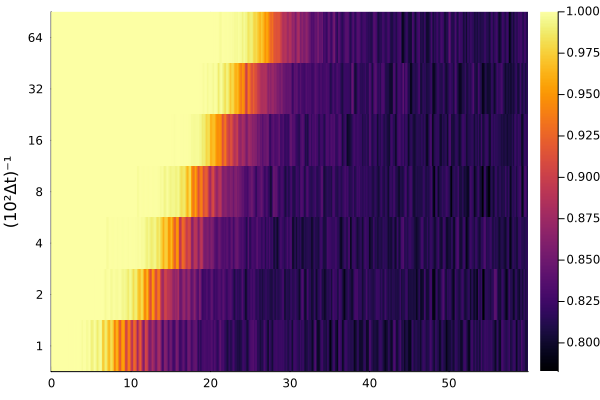

In [35]:
xticks = [2^(x-1) for x in 1:7]
print(xticks)
x = [0:Δt:Δt*(N-1)]
y = [1:7]
label = string("(10²Δt)⁻¹")
heatmap(x,y,Mavg, yticks=(1:7,xticks), ylabel=label)

In [27]:
x = 0.000001
print(round(x, sigdigits=1))

1.0e-6

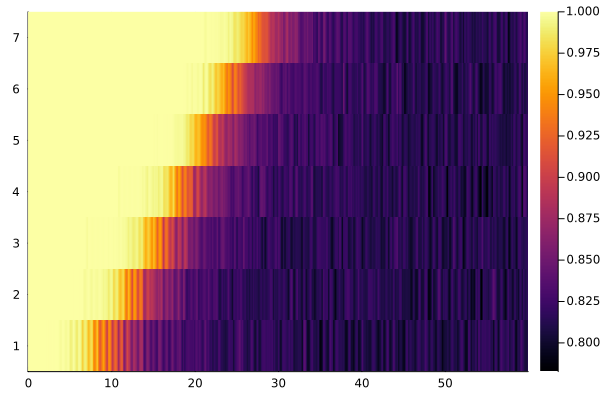

In [51]:
y = [1:1:7]
x = [0:Δt:Δt*(N-1)]
heatmap(x,y,Mavg)